# The Sparks Foundation:


# Task: Prediction using Decision Tree Algorithm


## Author: Saketh Maddineni

### Level : Intermediate




In [1]:
#Let's import the prerequisite libararies

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#let's read the data file
dataset = "Iris.csv"
data = pd.read_csv(dataset)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Before we proceed, let's take a proper look at our dataframe.

In [3]:
#Let's set the index to column Id.
data.set_index('Id', inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
data.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Length: 147, dtype: int64

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no Null values.

In [10]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

It is an object column so let's use data preprocessing techiniques to solve the categorical variables situation.
There are many ways to do deal with Categorical data like Ordinal Encoder, One-Hot Encoding. let's use simple replace().

In [11]:
df = data.copy()
df.Species.replace("Iris-setosa", '0', inplace = True)
df.Species.replace("Iris-versicolor", '1', inplace = True)
df.Species.replace("Iris-virginica", '2', inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [12]:
df.Species.unique()

array(['0', '1', '2'], dtype=object)

The Species Data column is of Object data type let's convert it to Int64 type using astype() function.

In [13]:
df.Species.astype('int64')

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [14]:
y = df.Species
y.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: object

In [15]:
X = df.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] ]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


Now, Let's work on our Decision Tree Classifier

In [16]:
#importing the required libraries.
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

my_classifier = DecisionTreeClassifier(random_state = 0)
model = my_classifier.fit(X, y)

Our Decision Tree Classifier is succefsully built.
Now let's visuaize our Decision Tree.

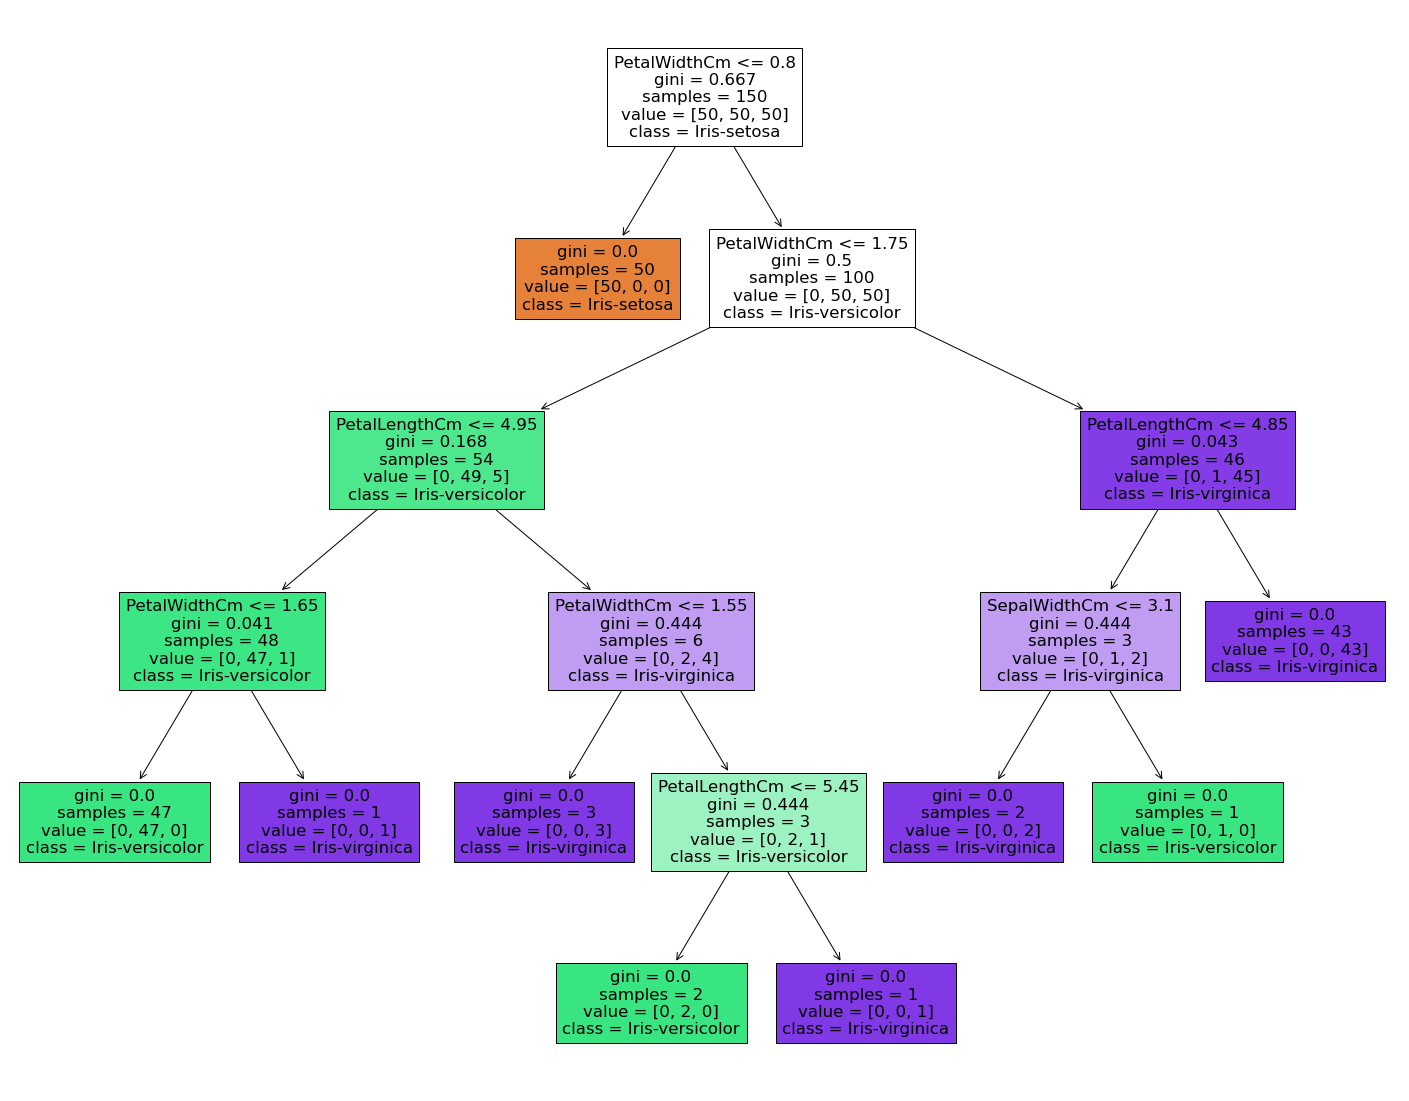

In [17]:
from matplotlib import pyplot as plt
fnames = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]
classn = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(my_classifier, 
                   feature_names=fnames,  
                   class_names=classn,
                   filled=True)


Now, we can use this Classifier to predict the class of new member provided with the correct features.